<div class="alert alert-block alert-success">
    
# FIT5196 Task 1 in Assessment 1
#### Student Name: Kehan Liu
#### Student ID: 32281943

Date: 20/08/2022


Environment: Python 3.9.7

Libraries used:
* os (for interacting with the operating system, included in Python 3.9.7 package) 
* re (for regular expression, installed and imported) 
* pandas (for data manipulation) 
    
</div>

<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Introduction](#Intro) <br>
[2. Importing Libraries](#libs) <br>
[3. Examining Review Files](#examine) <br>
[4. Loading and Parsing Files](#load) <br>
$\;\;\;\;$[4.1. Defining Regular Expressions](#Reg_Exp) <br>
$\;\;\;\;$[4.2. Reading Files](#Read) <br>
$\;\;\;\;$[4.3. Convert the extracted data to Dataframe](#latin) <br>
[5. Writing to an CSV File](#write) <br>
$\;\;\;\;$[5.1. Verification - using the sample files](#test_xml) <br>
[6. Summary](#summary) <br>
[7. References](#Ref) <br>

-------------------------------------

<div class="alert alert-block alert-warning">

## 1.  Introduction  <a class="anchor" name="Intro"></a>
    
</div>

This assessment regards extracting data from semi-sctuctured text files. The dataset contained 500 `.txt` files which included various information about user reviews. In particular, the content of txt file is html structure.

-------------------------------------

<div class="alert alert-block alert-warning">
    
## 2.  Importing Libraries  <a class="anchor" name="libs"></a>
 </div>

The only permitted packages to be used in this assessment are imported in the following. They are used to fulfill the following tasks:

* **os:** to interact with the operating system, e.g. navigate through folders
* **re:** to define and use regular expressions
* **pandas:** to generate the extracted data and covert them into the csv file

In [2]:
import os
import re
import pandas as pd

-------------------------------------

<div class="alert alert-block alert-warning">

## 3.  Examining Review Files <a class="anchor" name="examine"></a>

 </div>

First of all, using pandas to view the sample output csv file

In [5]:
df_sample = pd.read_csv('./sample IO/sample_output_task1.csv')
df_sample.describe()

,PID,product_review,review_summary,latest_review_date
count,15,15,15,15
unique,15,15,15,15
top,B000KIQ15U,['This is worth it for the convenience and the...,"['OK. Value for money. Nothing spectacular', '...",01/02/2014
freq,1,1,1,1


In [19]:
df_sample['PID']

0     B000KIQ15U
1     B001I4HF8W
2     B0037NYQ5C
3     B0052MNIAA
4     B0068Y7HUS
5     6304432437
6     B00005LMAL
7     B00005RDB0
8     B00091S6RY
9     B00A704PG8
10    1577319109
11    1600761259
12    1601420137
13    1612961657
14    B00CLUGBXW
Name: PID, dtype: object

In [21]:
df_sample['product_review'][0]

'[\'This is worth it for the convenience and the space-saving way it clips underneath the Dell Ultrasharp screen. The sound is clear but lacking in punch in the mid-range and with poor bass response, but that is inevitable for a speaker of this size and weight. Four stars because it is good. Not 5 stars because it is not excellent.\', "Just received the sound bar and installation was easy.  It has decent sound for what it is, a small speaker.  If you want great sound, this is wrong product.  I clips right onto the bottom of the monitor (but you better make sure you have the correct Dell monitor for this speaker) so it is office the desktop.I have one question for the designers.  The monitor has 4 powered USB ports.  Why did you design a product that required the AC/DC converter and speaker cable rather than have it plug into the USB port that is 2 inches away?  Also, that blue light did not have to be so bright.  It is dead on center and really annoying.  If you had placed the light 6 

In [22]:
df_sample['review_summary'][0]

'[\'OK. Value for money. Nothing spectacular\', \'Decent sound, small package but why not USB powered?\', \'Excellent Product\', \'On time and asexpected\', \'Generally good item\', \'Sound Bar\', \'Ordered, but not received\', \'no need for power supply with some monitors!!\', \'Simple but functional, not NEW\', \'Bought two and both came looking like they were 10 years old\', \'Outstanding Buy\', "They didn\'t include power supply", \'Great value, space saver\', \'works and easy to install\', "Get\'em while you still can"]'

In [23]:
df_sample['latest_review_date']

0     01/02/2014
1     03/07/2014
2     27/04/2014
3     28/06/2014
4     17/02/2014
5     03/06/2014
6     14/06/2014
7     31/01/2014
8     08/07/2014
9     04/07/2014
10    10/12/2013
11    03/08/2011
12    05/06/2014
13    31/07/2013
14    06/07/2014
Name: latest_review_date, dtype: object

Having examined the sample output file content, the following observations were made:

PID -> each txt file contain a unique product id

product_review -> the format of product review in output cav file is a list format

review_summary -> the format of review summary in output cav file is a list format

latest_review_date -> only the latest review date required in csv output and the format is dd/mm/yyyy


After that, check the content of sample txt file:

In [16]:
with open('./sample IO/sample/1.txt') as f1:
    content = f1.readlines()
content

['<!DOCTYPE html>\n',
 '<html lang="en">\n',
 '  <head>\n',
 '\n',
 '    <!-- Declared Vars To Go Here -->\n',
 '\n',
 '    <meta charset="utf-8">\n',
 '    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n',
 '    <meta name="viewport" content="width=device-width, initial-scale=1">\n',
 '\n',
 '    <!-- Metadata -->\n',
 '    <meta name="description" content="">\n',
 '    <meta name="author" content="">\n',
 '\n',
 '    <link rel="icon" href="mysource_files/favicon.ico">\n',
 '\n',
 '    <!-- Page Name and Site Name -->\n',
 '    <title>A1-Task1</title>\n',
 '\n',
 '    <!-- CSS -->\n',
 '    <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.6/css/bootstrap.min.css" rel="stylesheet">\n',
 '    <link href="mysource_files/style.css" rel="stylesheet">\n',
 '\n',
 '  </head>\n',
 '\n',
 '  <body>\n',
 '\n',
 '    <div class="container">\n',
 '\n',
 '      <header class="header clearfix" style="background-color: #ffffff">\n',
 '\n',
 '        <!-- Main Menu -->\n',
 '        

The txt file is html format and one txt file contain only one product id, but with many different review text, review date, and review summary.

PID -> product id -> the content of id is followed by html heading "Product ID"

product_review -> REVIEW TEXT -> the content of product_review is followed by html secondary heading "REVIEW TEXT"

review_summary -> REVIEW SUMMARY -> the content of review_summary is followed by html secondary heading "REVIEW SUMMARY"

latest_date -> REVIEW DATE -> the content of latest_date is folliwed by html secondary heading "REVIEW DATE"




-------------------------------------

<div class="alert alert-block alert-warning"> 

## 4.  Loading and Parsing Files <a class="anchor" name="load"></a>

</div>

In this section, all the `.txt` files are parsed and processed. First of all, appropriate regular expressions are defined to extract desired information when reading the files. After that, using the regex to extract data and saving them in different lists prepare for covert to dataframe. Lastly, using pandas to create a dataframe prepare for writing to csv.

-------------------------------------

<div class="alert alert-block alert-info">
    
### 4.1. Defining Regular Expressions <a class="anchor" name="Reg_Exp"></a>

Defining correct regular expressions is crucial in extracting desired information from the text efficiently. Sice we have found the location of the required content in the txt files by observe the txt files, therefore, we can use the pattern that we have observed in txt files to help us design the correct and effcient regular expressions. In this section, we need four regex for extract content from txt files.

First of all, find the Keyword of output content

In [46]:
pid_title = []
review_title = []

for item in os.listdir('32281943'):
    if item != '.DS_store':
        with open('32281943/' + item, 'r') as data_extract_file:
            data_extract = data_extract_file.read()
            pid_attr = re.findall(r'<h1>(.*?)<h1>', data_extract)
            pid_title.extend(pid_attr)
            review_attr = re.findall(r'<h2>(.*?).<.*>', data_extract)
            review_title.extend(review_attr)
            

In [42]:
set(pid_title)

{' PRODUCT.ID ',
 ' PRODUCT_ID ',
 ' Product ID ',
 ' REVIEWS ',
 ' product.reviews ',
 ' product_reviews '}

In [48]:
set(review_title)

{' REVIEW DATE',
 ' REVIEW SUMMARY',
 ' REVIEW TEXT',
 ' review.date',
 ' review.summary',
 ' review.text',
 'Sub Headin'}

The output cells above shows the pattern of keywords to position the output content. By observe these output, we can find that there are different pattern of keyword in txt files; And these pattern can help us to design the regex.

In [ ]:
pattern_id = r'<h1>.*?<h1>\n <p> (\S.*?) <p>' 


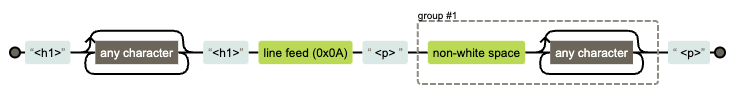

The product id can be found the after the h1 HTML tag and followed by a line break'\n'and start with paragraph html tag, so we can use these two html tags to loacte the id and using group() to return the id that we need.

In [ ]:
pattern_review = r'<h2> (?:review.text|REVIEW TEXT).<.*>\n\n.<p>.(.*?).<\/p>'

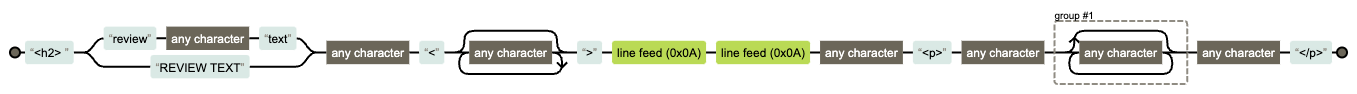

In the observation before, we found that review text has two different format in txt file, hence, we use (?: to match patterns review.text|REVIEW TEXT but not get result. | means match the pattern review.text or REVIEW TEXT. Since review is the secondary heading in html file so use heading html tag to match review summary title. And the final result can be found after two break lines and followed by pargraph html tags and one white space. so we use pargraph html tags and . to loacte the review content and use group() to return the review content that we need.

In [ ]:
pattern_summary = r'<h2> (?:review.summary|REVIEW SUMMARY).<.*>\s\s.<p>.(.*?).<.*>'

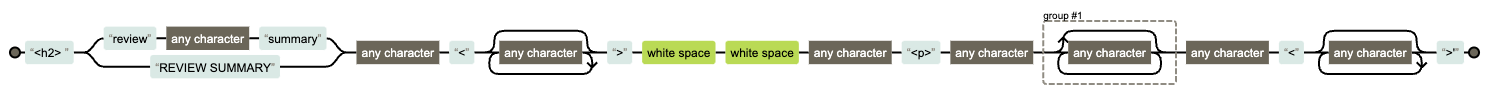

Same with product review, there has two different pattern of review summary based on the observation before, therefore
use (?: to match patterns review.summary|REVIEW SUMMARY but not get result. | means match the pattern review.summary or REVIEW SUMMARY. Since review summary is the secondary heading in html file so use heading html tag to match review summary title. And the final result can be found after two break lines and followed by pargraph html tags and one white space. so we use pargraph html tags and . to loacte the review content and use group() to return the review summary content that we need.

In [ ]:
pattern_date = r'<h2> (?:review.date|REVIEW DATE).<.*>\n..(\S{0,10})'

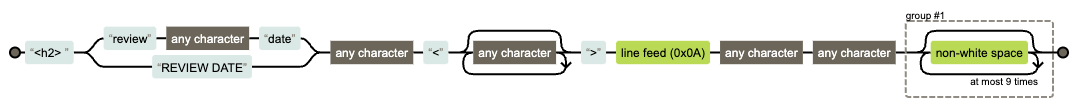

Same with product review and summary , there has two different pattern of review date based on the observation before, therefore use (?: to match patterns review.date|REVIEW DATE but not get result. | means match the pattern review.summary or REVIEW SUMMARY. Since review summary is the secondary heading in html file so use heading html tag to match review date title. And the final result can be found after a break lines and followed by two white space.\S{0,10} means find the non-whitespace characters that at least zero to 10 occurrences. As a result, we use \n and . to loacte the review date content and use group() to return the review date content that we need.

These patterns are used in the next step when reading the files.

-------------------------------------

<div class="alert alert-block alert-info">
    
### 4.2. Reading Files and Extract information <a class="anchor" name="Read"></a>

In this step, all tweet files are read and parsed while using the regular expression that has defined before. Since there may have hidden file in mac system, therefore set "item != '.DS_store'" for only open non-hidden files.

In [50]:
product_id_list = []
product_review_list = []
product_summary_list = []
product_date_list = []


Create four empty list for store extracted information

In [51]:
for item in os.listdir('32281943'):
    if item != '.DS_store':
        with open('32281943/' + item) as data_extract_file:
            data_extract = data_extract_file.read()
            product_id = re.findall(r'<h1>.*?<h1>\n <p> (\S.*?) <p>', data_extract)
            product_review = re.findall(r'<h2> (?:review.text|REVIEW TEXT).<.*>\n\n.<p>.(.*?).<\/p>', data_extract)
            product_summary = re.findall(r'<h2> (?:review.summary|REVIEW SUMMARY).<.*>\s\s.<p>.(.*?).<.*>', data_extract)
            product_review_date = re.findall(r'<h2> (?:review.date|REVIEW DATE).<.*>\n..(\S{0,10})',data_extract)
            product_review_date.sort(key = lambda x:x[-4:] + x[:5], reverse = True)
            latest_date = product_review_date[0]
            product_id_list.extend(product_id)
            product_review_list.append(product_review)
            product_summary_list.append(product_summary)
            product_date_list.append(latest_date)

Since the final output in csv file only need the latest date of review date, and based on the observation before we find that there has many different review date in one txt file, therefore, we using lambda convert the extracted review date 'dd-mm-yyyy' to the numbers format and then use sort function to sorting in descending order. The latest date now is the first element in product_review_date. Then use the list to store the extracted data. In the list storage part we use append for review and summary in order to when output to csv file can have the same list format like sample.

Let's take a look at the first ten elements of the lists generated. We can see that ids, dates, and tweets are parsed and stored correctly.

In [52]:
product_id_list[:10]

['B006T0R1WU',
 'B001Y44EBW',
 'B003VADRZ6',
 'B000SMZ9E2',
 'B0009W7OJO',
 'B005QFH4L2',
 'B0055U94G6',
 'B0089GWZ82',
 'B00E4C8OTO',
 '149541857X']

In [53]:
product_review_list[:10]

[["if you are someone like me who has ingested just about every crime media from sweden and scandinavia, the problem becomes you start getting picky.  there is only so much new and different which can be done in crime shows and the swedes have already broken all records with wallander and salander.  of the females in crime detecting in sweden, liz salander is the best, from the millenium trilogy.  then irene huss comes next.  and finally maria wern, the cop in this series.  dare i say it?  she is almost too normal.she does not have any quirks which make her stand out from the pack although she is arguably the best looking..in sum, i liked these cases with wern but i didn't love them.  if more were released tomorrow, i'd skip them.  if you have not seen much of swedish crime shows though, only american ones, it will probably strike you as terrific.",
  "The acting, story-lines,images and editing for this series are second-rate......spend your $$$$$ and time on series such as Silent Witn

In [54]:
product_summary_list[:10]

[["depends how much swedish film, tv, crime novels you've experienced",
  'second-rate',
  'This is a must watch.',
  'Eyes glued on family while being a "super" cop',
  'Wern at the Crotch',
  'First-rate',
  'katie',
  'Good series',
  'Scandinavian police procedural, episodes 1 to 3',
  'Twists and Turns',
  'Love series and setting, Gotland, Sweden.',
  '3  stars- Beautiful, Atmospheric, worth seeing'],
 ['Beautiful, moving, emotional and endearing!',
  'Cinema as pure poetry',
  "These blooms fade by film's end...",
  'Given as a Gift',
  'touching saga',
  'A Journy of Self-Discovery',
  'Dance of Darkness...and Light',
  'Song of Life, Dance of Shadows',
  'Spiritual Cynosure:  A most religious movie, with specific faith',
  'An incredible film',
  'Soul Inspiring Masterpiece',
  'Gentle, touching, remarkable',
  'A Visual Tone Poem About the Meaning of Life - Brilliant!',
  'Love, sadness, agony, beauty... and Japan',
  'A beautiful movie that will move you and haunt your thoug

In [55]:
product_date_list[:10]

['07-01-2014',
 '01-08-2014',
 '07-11-2014',
 '12-02-2013',
 '02-04-2014',
 '02-11-2013',
 '06-12-2014',
 '04-18-2014',
 '01-11-2014',
 '07-17-2014']

-------------------------------------

<div class="alert alert-block alert-info">
    
### 4.3. Convert the extracted data to Dataframe <a class="anchor" name="test_xml"></a>

In this step, we will use pandas to convert our extracted result to a dataframe for write to CSV file.

In [57]:
df_output = pd.DataFrame({'PID':product_id_list,'product_review':product_review_list, 
                       'review_summary':product_summary_list,
                      'latest_review_date':product_date_list}) 

In [58]:
df_output

,PID,product_review,review_summary,latest_review_date
0,B006T0R1WU,[if you are someone like me who has ingested j...,"[depends how much swedish film, tv, crime nove...",07-01-2014
1,B001Y44EBW,[Cherry Blossoms (2008) film by Doris Dorrie i...,"[Beautiful, moving, emotional and endearing!, ...",01-08-2014
2,B003VADRZ6,[I only gave it 4 stars..ONLY because I don't ...,"[Just like the old FIRMS..with a kick!, Target...",07-11-2014
3,B000SMZ9E2,[I bought this product a while back and it wor...,"[works fine, what I needed, Works with Canon H...",12-02-2013
4,B0009W7OJO,[This ram brought my old Dell Dimension 2400 u...,"[WHAT A BOOST!!, Did Not Get What I Ordered Bu...",02-04-2014
...,...,...,...,...
495,B000UD6E48,[I had this HP Personal Media Drive for over a...,"[It slides right in, Works Great, completed sy...",04-27-2010
496,B001H2ZHJ4,[Most of this movie centers around a kid being...,"[Could of been better, cheesy. I had hard time...",02-07-2014
497,B00120LPOW,[I am happy with my recent purchase of wwe: tw...,[wwe: twist of fate-the matt and jeff hardy st...,03-07-2014
498,B0071LEMQ4,[TL:DR version first off:Pros: the narrator is...,"[bland, boring and short, Excellent a must own...",03-15-2014


We can see that the latest_review_date still need to change it format to consist with the sample output. Therefore, using .apply function to transfer the latest review date format to 'dd/mm/yyyy'.

In [59]:
df_output['latest_review_date'] = df_output['latest_review_date'].apply(lambda x:x[3:5]+'/'+ x[:2]+'/'+x[-4:])

In [60]:
df_output

,PID,product_review,review_summary,latest_review_date
0,B006T0R1WU,[if you are someone like me who has ingested j...,"[depends how much swedish film, tv, crime nove...",01/07/2014
1,B001Y44EBW,[Cherry Blossoms (2008) film by Doris Dorrie i...,"[Beautiful, moving, emotional and endearing!, ...",08/01/2014
2,B003VADRZ6,[I only gave it 4 stars..ONLY because I don't ...,"[Just like the old FIRMS..with a kick!, Target...",11/07/2014
3,B000SMZ9E2,[I bought this product a while back and it wor...,"[works fine, what I needed, Works with Canon H...",02/12/2013
4,B0009W7OJO,[This ram brought my old Dell Dimension 2400 u...,"[WHAT A BOOST!!, Did Not Get What I Ordered Bu...",04/02/2014
...,...,...,...,...
495,B000UD6E48,[I had this HP Personal Media Drive for over a...,"[It slides right in, Works Great, completed sy...",27/04/2010
496,B001H2ZHJ4,[Most of this movie centers around a kid being...,"[Could of been better, cheesy. I had hard time...",07/02/2014
497,B00120LPOW,[I am happy with my recent purchase of wwe: tw...,[wwe: twist of fate-the matt and jeff hardy st...,07/03/2014
498,B0071LEMQ4,[TL:DR version first off:Pros: the narrator is...,"[bland, boring and short, Excellent a must own...",15/03/2014


The data frame now seems same with the sample output format.

-------------------------------------

<div class="alert alert-block alert-warning"> 

## 5.  Writing to an CSV File <a class="anchor" name="write"></a>

</div>

In this section, we will use pandas to write our extracted result to the csv file. Since there is no index in the sample output csv file, so set the index = 0. 

In [61]:
df_output.to_csv('32281943.csv',index = 0)

-------------------------------------

<div class="alert alert-block alert-info">
    
### 5.1. Verification of the Generated CSV File <a class="anchor" name="test_xml"></a>

In [63]:
Verification_csv = pd.read_csv('32281943.csv')
Verification_csv

,PID,product_review,review_summary,latest_review_date
0,B006T0R1WU,"[""if you are someone like me who has ingested ...","[""depends how much swedish film, tv, crime nov...",01/07/2014
1,B001Y44EBW,"[""Cherry Blossoms (2008) film by Doris Dorrie ...","['Beautiful, moving, emotional and endearing!'...",08/01/2014
2,B003VADRZ6,['I only gave it 4 stars..ONLY because I don\'...,"['Just like the old FIRMS..with a kick!', 'Tar...",11/07/2014
3,B000SMZ9E2,['I bought this product a while back and it wo...,"['works fine', 'what I needed', 'Works with Ca...",02/12/2013
4,B0009W7OJO,['This ram brought my old Dell Dimension 2400 ...,"['WHAT A BOOST!!', 'Did Not Get What I Ordered...",04/02/2014
...,...,...,...,...
495,B000UD6E48,"[""I had this HP Personal Media Drive for over ...","['It slides right in', 'Works Great', 'complet...",27/04/2010
496,B001H2ZHJ4,['Most of this movie centers around a kid bein...,"['Could of been better', 'cheesy. I had hard t...",07/02/2014
497,B00120LPOW,['I am happy with my recent purchase of wwe: t...,['wwe: twist of fate-the matt and jeff hardy s...,07/03/2014
498,B0071LEMQ4,['TL:DR version first off:Pros: the narrator i...,"['bland, boring and short', 'Excellent a must ...",15/03/2014


In [64]:
Verification_csv.describe()

,PID,product_review,review_summary,latest_review_date
count,500,500,500,500
unique,500,500,500,272
top,B006T0R1WU,"[""if you are someone like me who has ingested ...","[""depends how much swedish film, tv, crime nov...",12/07/2014
freq,1,1,1,9


The output result is consist with the requirement. 

-------------------------------------

<div class="alert alert-block alert-warning"> 

## 6. Summary <a class="anchor" name="summary"></a>

</div>

This task is mainly use the regex and pandas to extract data and write data to the csv file. 

-------------------------------------

<div class="alert alert-block alert-warning"> 

## 7. References <a class="anchor" name="Ref"></a>

</div>



[1]<a class="anchor" name="ref-2"></a>Python Documentation re — Regular expression operations, https://docs.python.org/3/library/re.html?highlight=re#module-re ,Accessed 02/09/2022.

[1]<a class="anchor" name="ref-2"></a>Pandas Documentation Version1.4.4,https://pandas.pydata.org/docs/, Accessed 02/09/2022.



## --------------------------------------------------------------------------------------------------------------------------